# Load data

In [1]:
#load data
import pandas as pd


In [2]:
dtypesBvot = {
    'NUMTOUR' :    'int64',
    'CODDPT' :    'object',
    'CODSUBCOM' :  'int64',
    'LIBSUBCOM' : 'object',
    'CODBURVOT' : 'object',
    'CODCAN' :     'int64',
    'LIBCAN' :    'object',
    'NBRINS' :     'int64',
    'NBRVOT' :     'int64',
    'NBREXP' :     'int64',
    'NUMDEPCAND' : 'int64',
    'LIBLISEXT' : 'object',
    'CODNUA' :    'object',
    'NBRVOIX' :    'int64',
}

dtypesCantons = {
    'Code du département' :    'object',
}


#load data
data_canton_FR = pd.read_excel(r'../dataset/raw/Dep_15_Resultats_T2_complet.xlsx', sheet_name='Cantons', dtype=dtypesCantons)
dataBvot = pd.read_csv('../dataset/raw/DP15_Bvot_T1T2.csv', delimiter=';', dtype=dtypesBvot)

data_canton_FR.columns

Index(['Date de l'export', 'Code du département', 'Libellé du département',
       'Code du canton', 'Libellé du canton', 'Inscrits', 'Abstentions',
       '% Abs/Ins', 'Votants', '% Vot/Ins', 'Blancs', '% Blancs/Ins',
       '% Blancs/Vot', 'Nuls', '% Nuls/Ins', '% Nuls/Vot', 'Exprimés',
       '% Exp/Ins', '% Exp/Vot', 'N°Panneau', 'Nuance', 'Binôme', 'Sièges',
       'Voix', '% Voix/Ins', '% Voix/Exp', 'N°Panneau.1', 'Nuance.1',
       'Binôme.1', 'Sièges.1', 'Voix.1', '% Voix/Ins.1', '% Voix/Exp.1',
       'N°Panneau.2', 'Nuance.2', 'Binôme.2', 'Sièges.2', 'Voix.2',
       '% Voix/Ins.2', '% Voix/Exp.2'],
      dtype='object')

### Filter loaded data

In [3]:
################################# fonction utile #############################
def saveData(data, loc):
    # save cher_data as excel
    writer = pd.ExcelWriter(loc)
    
    # write dataframe to excel
    data.to_excel(writer)

    # save the excel
    writer.save()

############################# Format des donnees brute ##############################

def getNbBinomes(data):
    return len([header for header in data.columns if "Binôme" in header])

def explodeLines(data):
    initdf = data[['Code du département', 'Libellé du département', 'Code du canton', 
            'Libellé du canton', 'Inscrits', 'Abstentions', '% Abs/Ins', 'Votants',
            '% Vot/Ins', 'Blancs', '% Blancs/Ins', '% Blancs/Vot', 'Nuls', '% Nuls/Ins',
            '% Nuls/Vot', 'Exprimés', '% Exp/Ins', '% Exp/Vot']]

    headers = ['N°Panneau', 'Nuance', 'Binôme', 'Sièges', 'Voix', '% Voix/Ins', '% Voix/Exp']
    
    df = pd.DataFrame()
    for i in range(getNbBinomes(data)):
        partidf = data[[h+'.'+str(i) if i!=0 else h for h in headers]]
        partidf = pd.concat([initdf, partidf], axis=1)
        partidf.columns = pd.Index(initdf.columns.values.tolist() + headers)
        df = pd.concat([df, partidf])
    
    # Remove useless rows   
    df = df.dropna(how='all', subset=headers)
    
    return df

In [4]:
departements = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95']

# filtre les departements speciaux
dataBvot = dataBvot[dataBvot['CODDPT'].isin(departements)]
data_canton_FR = data_canton_FR[data_canton_FR['Code du département'].isin(map(int, departements))]

#separe les donnees du tour 1 et 2 
dataT1Bvot = dataBvot[dataBvot.NUMTOUR==1]
dataT2Bvot = dataBvot[dataBvot.NUMTOUR==2]

#explode line 
data_canton_FR = explodeLines(data_canton_FR)


assert len(dataBvot['CODDPT'].unique())==len(data_canton_FR['Code du département'].unique())
print('ok')

ok


In [5]:
data_canton_FR.loc[(data_canton_FR['Code du département']==87) & (data_canton_FR['Code du canton']==2)]


Code du département Libellé du département  Code du canton  \
1685                  87           HAUTE VIENNE               2   
1685                  87           HAUTE VIENNE               2   
1685                  87           HAUTE VIENNE               2   

     Libellé du canton  Inscrits  Abstentions  % Abs/Ins  Votants  % Vot/Ins  \
1685           Ambazac     14520         5840      40.22     8680      59.78   
1685           Ambazac     14520         5840      40.22     8680      59.78   
1685           Ambazac     14520         5840      40.22     8680      59.78   

      Blancs  ...  Exprimés  % Exp/Ins  % Exp/Vot  N°Panneau  Nuance  \
1685     529  ...      7881      54.28      90.79        1.0  BC-SOC   
1685     529  ...      7881      54.28      90.79        4.0   BC-UD   
1685     529  ...      7881      54.28      90.79        3.0   BC-FN   

                                               Binôme  Sièges    Voix  \
1685          M. AUZEMERY Alain et Mme LARDY Brigitte    Elus  3471.0   
1685  M. BERTRAND Jean-Michel et Mme DELAGNIER Karine          2278.0   
1685        M. HUITEMA Jean-René et Mme LEOMENT Marie          2132.0   

      % Voix/Ins % Voix/Exp  
1685       23.90      44.04  
1685       15.69      28.90  
1685       14.68      27.05  

[3 rows x 25 columns]

# Dictionnaire des duels

In [6]:
#################################### Dictionnaire des duels #####################################

def getNuanceOfElected(data, col_siege='Sièges', col_nuance='Nuance'):
    elected = data[data[col_siege]=='Elus']
    return list(elected[col_nuance]) if len(elected)!=0 else None

def filterBestNuances(data, col_nuance='Nuance', criteria=12.50):
    bestCandidat = data[data['% Voix/Ins']>= criteria]
    
    if bestCandidat.empty or len(bestCandidat)==1:
        bestCandidat = data.sort_values(by='Voix', ascending=False).iloc[0:2,:]

    return list(bestCandidat[col_nuance])

def getDuelsFromDep(data_dep, col_dep='Code du département', col_canton='Code du canton', col_siege='Sièges', col_nuance='Nuance'):
    '''
        ATTENTION : data doit etre EXPLODE !
        return : {'canton_1':[P1,...,P_k], ..., 'canton_n':[P1,...,P_K]}, 
                                        ..., 
                    'canton_N':[P1,...,P_i], ..., 'canton_m':[P1,...,P_I]}
                  }
    '''
    duels = dict()
    for canton in data_dep[col_canton].unique():
        data_canton = data_dep[data_dep[col_canton]==canton]
        duels[str(canton)]= list(data_canton[col_nuance].unique())
    return duels 

def optimizedDuelDict(duels):
    '''
        return : {'duel_1':{'dep':[canton],..., 'duel_n':[canton]},
                            ...,
                  'duel_N':{'dep':[canton],..., 'duel_n':[canton]}
                  }
            avec :
                  - duel = 'P1:P2:...:Pn'
    '''
    optdict = dict()
    for dep, duelDepDict in duels.items():
        for canton, duelList in duelDepDict.items():
            key = ':'.join(sorted(duelList))
            if key in optdict.keys():                
                if dep in optdict[key].keys():
                    optdict[key][dep].append(int(canton))
                else:
                    optdict[key][dep]=[int(canton)]
            else:
                optdict[key]= dict([(dep, [int(canton)])])
    return optdict

In [7]:
#dictionnaire des duels
duels = dict()
for dep in data_canton_FR['Code du département'].unique():
    duels[str(dep)]= getDuelsFromDep(data_canton_FR[data_canton_FR['Code du département']==dep])
    if duels[str(dep)]==[]:
        print('empty list for dep : ', dep)

#dictionnaire ooptimize
optDuels = optimizedDuelDict(duels)


In [8]:
len(optDuels)

99

In [9]:
# compte le nombre de departement ou le duel courant est represente dans un seul canton
count = 0
nbCantonList = 0
for duel, duelDict in optDuels.items():
    for dep, cantonList in duelDict.items():
        if len(cantonList)==1:
            count+=1
        elif len(cantonList)==0:
            print(f'duel {duel}, dep {dep} empyt list')
        nbCantonList+=1
print('count', count, 'nbCantonList', nbCantonList, 'pourcentage', (count/nbCantonList)*100)

count 452 nbCantonList 792 pourcentage 57.07070707070707


## Preparation des donnees pour le reseau de neuronne

In [10]:
#################################### Data Processing ####################################

def prepareInputDataExploded(data):
    tmp = data[['NUMTOUR', 'CODDPT', 'CODSUBCOM', 'LIBSUBCOM', 'CODBURVOT', 'CODCAN',
            'LIBCAN', 'NBRINS', 'NBRVOT', 'NBREXP', 'CODNUA', 'NBRVOIX']].copy()

    # Compute missing data
    tmp['NBRABS'] = tmp['NBRINS'] - tmp['NBRVOT']
    tmp['NBRBLCNUL'] = tmp['NBRVOT'] - tmp['NBREXP']
    tmp['%ABS/INS'] = tmp['NBRABS'] / tmp['NBRINS']
    tmp['%BLCNUL/VOT'] = tmp['NBRBLCNUL'] / tmp['NBRVOT']
    tmp['%EXP/VOT'] = tmp['NBREXP'] / tmp['NBRVOT']
    tmp['%VOIX/EXP'] = tmp['NBRVOIX'] / tmp['NBREXP']

    nuances = getAllNuances(data)
    statsFeatures = ['NBRINS', 'NBREXP', '%ABS/INS', '%BLCNUL/VOT', '%EXP/VOT']
    idFeatures = ['CODDPT', 'CODCAN', 'CODSUBCOM', 'CODBURVOT']

    exprimes = tmp[idFeatures + ['NBREXP']].drop_duplicates().sort_values(idFeatures)['NBREXP']
    stats = tmp[idFeatures + statsFeatures].drop_duplicates()[statsFeatures]
    ids = tmp[idFeatures].drop_duplicates()

    # Create [%Voix] and fill it
    voix = pd.DataFrame(0, index=data.index, columns=nuances)
    for parti in nuances:
        voix[parti][data['CODNUA']==parti] = tmp[tmp['CODNUA']==parti]['NBRVOIX']
    voix = pd.concat([tmp[idFeatures], voix], axis=1).groupby(idFeatures).sum()[nuances]
    voix.index = exprimes.index

    # Concat with computed stats and divide almost everything by Exprimés
    voix = voix.divide(exprimes, axis=0)
    X = pd.concat([stats, voix], axis=1)
    X.index = pd.MultiIndex.from_frame(ids)
    return X.sort_values(['CODDPT', 'CODCAN', 'CODSUBCOM', 'CODBURVOT']).fillna(0)

def getAllNuances(data, colNuance='CODNUA', fmt='exploded'):
    if fmt not in ['exploded', 'line']:
        raise ValueError("format parameter must be 'exploded' or 'line'")
    
    if fmt == 'exploded':
        nuances = data[colNuance].unique()
    
    if fmt == 'line':
        nuances = np.array([])
        nuances_tmp = data[colNuance].fillna(0)
        for c in nuances_tmp:
            nuances = np.append(nuances, nuances_tmp[c])
        nuances = np.unique(nuances[nuances!=0])
    
    return sorted(nuances)

# retourne un dataset associe a un duel
def extractDuelRaw(X, y, duel, col_canton='CODCAN', col_dep='CODDPT'):
    correction = [str(i) for i in range(1,10)]
    X_duel = pd.DataFrame()
    y_duel = pd.DataFrame()

    #remove canton where there is a winner in the 1st turn
    for dep, cantonList in optDuels[':'.join(sorted(duel))].items():
        X_duel = pd.concat([X_duel, X.loc[( X[col_dep] == (dep if dep not in correction else '0'+dep) ) & ( X[col_canton].isin(cantonList) )]])
        y_duel = pd.concat([y_duel, y.loc[( y[col_dep] == (dep if dep not in correction else '0'+dep) ) & ( y[col_canton].isin(cantonList) )]])
    
    return (X_duel, y_duel)

def prepareLabelsExploded(data, oneHotEncode=False):
    nuances = getAllNuances(data)
    idFeatures = ['CODDPT', 'CODCAN', 'CODSUBCOM', 'CODBURVOT']

    exprimes = data[idFeatures+['NBREXP']].groupby(idFeatures).first()

    # Create [%Voix] and fill it
    voix = pd.DataFrame(0, index=data.index, columns=nuances)
    for parti in nuances:
        voix[parti][data['CODNUA']==parti] = data[data['CODNUA']==parti]['NBRVOIX']
    voix = pd.concat([data[idFeatures], voix], axis=1).groupby(idFeatures).sum().sort_values(idFeatures)[nuances]

    # Concat with computed stats and divide voix by exprimes
    y = voix.divide(exprimes['NBREXP'], axis=0)
    return y.fillna(0)

In [11]:
data_canton_FR.columns

Index(['Code du département', 'Libellé du département', 'Code du canton',
       'Libellé du canton', 'Inscrits', 'Abstentions', '% Abs/Ins', 'Votants',
       '% Vot/Ins', 'Blancs', '% Blancs/Ins', '% Blancs/Vot', 'Nuls',
       '% Nuls/Ins', '% Nuls/Vot', 'Exprimés', '% Exp/Ins', '% Exp/Vot',
       'N°Panneau', 'Nuance', 'Binôme', 'Sièges', 'Voix', '% Voix/Ins',
       '% Voix/Exp'],
      dtype='object')

In [12]:
def testna(data):
    return len(data[data.isna().any(axis=1)])


In [13]:
#prepare les donnees
from sklearn.model_selection import train_test_split

nbSmallDataset = 0
nbDataset = 0
datasetDuels = dict()
for duel in optDuels:
    duel = sorted(duel.split(':'))
    if len(duel)>=2:

        #Selecting data
        X_duel, y_duel  = extractDuelRaw(dataT1Bvot, dataT2Bvot , duel)

        print('\n---------- Duel : ', duel, '-----------')
        print('Preparing input data... ', end='')
        X = prepareInputDataExploded(X_duel)
        print('OK')
        print('Preparing labels... ', end='')
        y = prepareLabelsExploded(y_duel)
        print('OK')

        assert X.shape[0]==y.shape[0]
        
        if len(y.columns)<2:
            print("duel with same nuance !")
            print("skipped")
            continue

        if testna(X_duel) or testna(y_duel) or testna(X) or testna(y):
            print('nan in X_duel', testna(X_duel))
            print('nan in y_duel', testna(y_duel))
            print('nan in X', testna(X))
            print('nan in y', testna(y))


        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,train_size=0.8, random_state=42, shuffle=True)

        duel = sorted([d for d in duel if d in y.columns])
        if len(duel)!=len(y.columns):
            print('duel unmatch,  duel', duel,'y.column', list(y.columns) )

        if ':'.join(duel) in datasetDuels:
            print('deja present ')
            oldX_train, oldX_test, oldy_train, oldy_test = datasetDuels[':'.join(duel)]
            X_train = pd.concat([X_train, oldX_train], sort=False)
            X_test  = pd.concat([X_test, oldX_test], sort=False)
            y_train = pd.concat([y_train, oldy_train], sort=False)
            y_test  = pd.concat([y_test, oldy_test], sort=False)
        datasetDuels[':'.join(duel)] = (X_train, X_test, y_train, y_test)
        if X_train.shape[0]<500:
            nbSmallDataset+=1
        nbDataset+=1
        assert X_train.shape[0]==y_train.shape[0] and y_train.shape[1]==y.shape[1]
        print(f'shape xtrain {X_train.shape} shape ytrain {y_train.shape} || shape xtest {X_test.shape} shape ytest {y_test.shape}')
print("pourcentage de petit dataset : ", (nbSmallDataset/nbDataset)*100)



---------- Duel :  ['BC-FN', 'BC-UD'] -----------
Preparing input data... OK
Preparing labels... OK
shape xtrain (10004, 23) shape ytrain (10004, 2) || shape xtest (2502, 23) shape ytest (2502, 2)

---------- Duel :  ['BC-FN', 'BC-UD', 'BC-UG'] -----------
Preparing input data... OK
Preparing labels... OK
shape xtrain (1760, 16) shape ytrain (1760, 3) || shape xtest (441, 16) shape ytest (441, 3)

---------- Duel :  ['BC-FN', 'BC-UG'] -----------
Preparing input data... OK
Preparing labels... OK
shape xtrain (1877, 23) shape ytrain (1877, 2) || shape xtest (470, 23) shape ytest (470, 2)

---------- Duel :  ['BC-UD', 'BC-UG'] -----------
Preparing input data... OK
Preparing labels... OK
shape xtrain (3104, 20) shape ytrain (3104, 2) || shape xtest (777, 20) shape ytest (777, 2)

---------- Duel :  ['BC-FN', 'BC-UMP'] -----------
Preparing input data... OK
Preparing labels... OK
shape xtrain (3466, 21) shape ytrain (3466, 2) || shape xtest (867, 21) shape ytest (867, 2)

---------- Duel

## build models

In [14]:
import tensorflow as tf
from matplotlib import pyplot

In [163]:
datasetDuels.keys()

dict_keys(['BC-FN:BC-UD', 'BC-FN:BC-UD:BC-UG', 'BC-FN:BC-UG', 'BC-UD:BC-UG', 'BC-FN:BC-UMP', 'BC-FN:BC-SOC', 'BC-FN:BC-UDI', 'BC-COM:BC-UD', 'BC-DVD:BC-FG', 'BC-DVD:BC-UG', 'BC-COM:BC-DVD:BC-FN', 'BC-DVD:BC-FN:BC-RDG', 'BC-DVD:BC-SOC', 'BC-SOC:BC-UMP', 'BC-DVD:BC-FN', 'BC-FN:BC-SOC:BC-UMP', 'BC-DVG:BC-FN', 'BC-SOC:BC-UD', 'BC-FG:BC-UD', 'BC-EXD:BC-UMP', 'BC-DVD:BC-DVG', 'BC-DVG:BC-UMP', 'BC-DVG:BC-UD', 'BC-DIV:BC-UD', 'BC-COM:BC-FN:BC-UD', 'BC-UG:BC-UMP', 'BC-FN:BC-SOC:BC-UD', 'BC-DVD:BC-FN:BC-UG', 'BC-FN:BC-UG:BC-UMP', 'BC-FN:BC-SOC:BC-UDI', 'BC-DVG:BC-FN:BC-UD', 'BC-DVD:BC-UD', 'BC-DVD:BC-DVG:BC-FN', 'BC-DVG:BC-SOC', 'BC-DVD:BC-FN:BC-SOC', 'BC-RDG:BC-UDI', 'BC-SOC:BC-UDI', 'BC-DVD:BC-UDI:BC-UG', 'BC-DVD:BC-RDG', 'BC-COM:BC-FN', 'BC-MDM:BC-SOC', 'BC-DIV:BC-DVD', 'BC-DIV:BC-DVG', 'BC-RDG:BC-SOC', 'BC-FN:BC-RDG', 'BC-FG:BC-FN', 'BC-RDG:BC-UD', 'BC-UDI:BC-UG', 'BC-SOC:BC-UC', 'BC-UD:BC-VEC', 'BC-DIV:BC-DVD:BC-FN', 'BC-FG:BC-FN:BC-UD', 'BC-DVG:BC-FN:BC-SOC', 'BC-DVG:BC-UG', 'BC-UMP:BC-VEC

In [335]:
tf.keras.backend.clear_session()

errorDict ={
    'mse': tf.keras.losses.MeanSquaredError(),
    'mae': tf.keras.losses.MeanAbsoluteError(),
    'mape': tf.keras.losses.MeanAbsolutePercentageError(),
    'msle': tf.keras.losses.MeanSquaredLogarithmicError(),
    'cos': tf.keras.losses.CosineSimilarity(axis=1),
}

models = dict()
for duel, dataset in datasetDuels.items():
    X_train, X_test, y_train, y_test = dataset

    model = tf.keras.Sequential()
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)))
    model.add(tf.keras.layers.Dense(32, activation='relu'))
    model.add(tf.keras.layers.Dense(y_train.shape[1], activation='softmax'))

    opt = tf.keras.optimizers.Adagrad(learning_rate=0.00001)
    model.compile(loss='mse', optimizer='adamax', metrics=['accuracy'])
    models[duel] = model
    

In [350]:
tf.keras.backend.clear_session()

# i = 0
# for duel, model in models.items():
    # i+=1
    # if i>10:
    #     break
# X_train, X_test, y_train, y_test = datasetDuels[':'.join(['BC-UD', 'BC-SOC'])]
# model = models[':'.join(['BC-UD', 'BC-SOC'])]
duel = ['BC-FN:BC-UD']
model= models[':'.join(duel)]
X_train, X_test, y_train, y_test = datasetDuels[':'.join(duel)]
X_train.shape, y_train.shape
len(datasetDuels.keys())

94


------------------- Duel : BC-FN:BC-UD -----------------
Train: 0.902, Test: 0.903
INFO:tensorflow:Assets written to: models/relu/BC-FN:BC-UD_adamax_train_0.90_test_0.90_loss_0.1485/assets


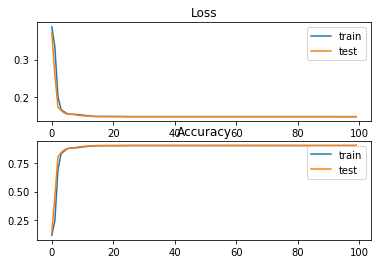

shape X_train (10004, 23)
Progression.................................... 1.0638297872340425 %

------------------- Duel : BC-FN:BC-UD:BC-UG -----------------
Train: 0.469, Test: 0.460
INFO:tensorflow:Assets written to: models/relu/BC-FN:BC-UD:BC-UG_adamax_train_0.47_test_0.46_loss_0.0734/assets


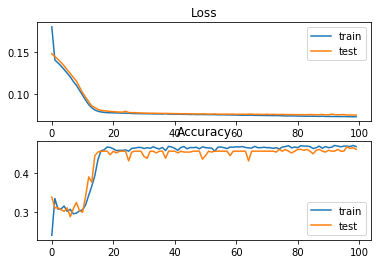

shape X_train (1760, 16)
Progression.................................... 2.127659574468085 %

------------------- Duel : BC-FN:BC-UG -----------------
Train: 0.611, Test: 0.621
INFO:tensorflow:Assets written to: models/relu/BC-FN:BC-UG_adamax_train_0.61_test_0.62_loss_0.2067/assets


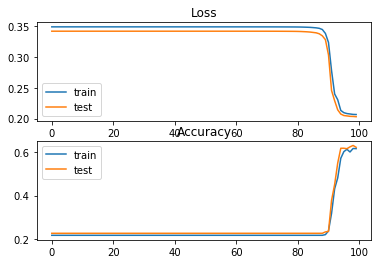

shape X_train (1877, 23)
Progression.................................... 3.1914893617021276 %

------------------- Duel : BC-UD:BC-UG -----------------
Train: 0.602, Test: 0.595
INFO:tensorflow:Assets written to: models/relu/BC-UD:BC-UG_adamax_train_0.60_test_0.59_loss_0.2202/assets


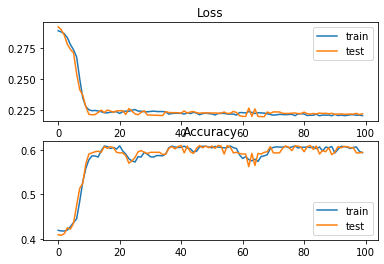

shape X_train (3104, 20)
Progression.................................... 4.25531914893617 %

------------------- Duel : BC-FN:BC-UMP -----------------
Train: 0.908, Test: 0.890
INFO:tensorflow:Assets written to: models/relu/BC-FN:BC-UMP_adamax_train_0.91_test_0.89_loss_0.1446/assets


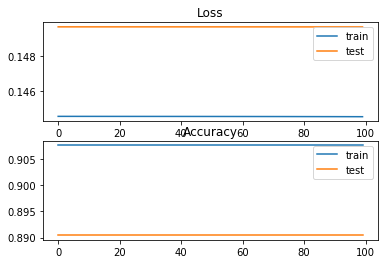

shape X_train (3466, 21)
Progression.................................... 5.319148936170213 %

------------------- Duel : BC-FN:BC-SOC -----------------
Train: 0.806, Test: 0.823
INFO:tensorflow:Assets written to: models/relu/BC-FN:BC-SOC_adamax_train_0.81_test_0.82_loss_0.1771/assets


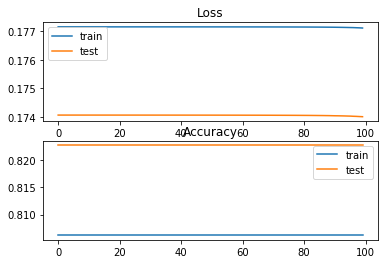

shape X_train (3519, 23)
Progression.................................... 6.382978723404255 %

------------------- Duel : BC-FN:BC-UDI -----------------
Train: 0.869, Test: 0.844
INFO:tensorflow:Assets written to: models/relu/BC-FN:BC-UDI_adamax_train_0.87_test_0.84_loss_0.0160/assets


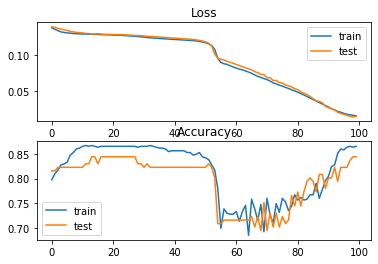

shape X_train (563, 16)
Progression.................................... 7.446808510638298 %

------------------- Duel : BC-COM:BC-UD -----------------
Train: 0.583, Test: 0.143
INFO:tensorflow:Assets written to: models/relu/BC-COM:BC-UD_adamax_train_0.58_test_0.14_loss_0.2216/assets


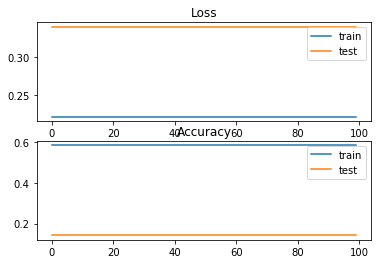

shape X_train (24, 9)
Progression.................................... 8.51063829787234 %

------------------- Duel : BC-DVD:BC-FG -----------------
Train: 0.261, Test: 0.273
INFO:tensorflow:Assets written to: models/relu/BC-DVD:BC-FG_adamax_train_0.26_test_0.27_loss_0.3295/assets


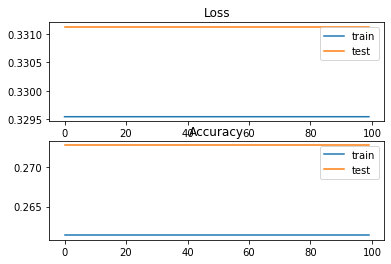

shape X_train (88, 12)
Progression.................................... 9.574468085106384 %

------------------- Duel : BC-DVD:BC-UG -----------------
Train: 0.479, Test: 0.367
INFO:tensorflow:Assets written to: models/relu/BC-DVD:BC-UG_adamax_train_0.48_test_0.37_loss_0.2014/assets


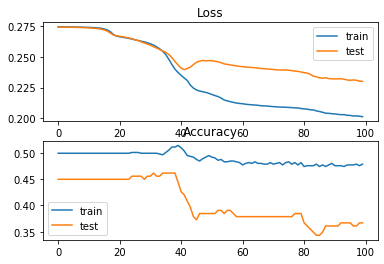

shape X_train (675, 18)
Progression.................................... 10.638297872340425 %

------------------- Duel : BC-COM:BC-DVD:BC-FN -----------------
Train: 0.731, Test: 0.857
INFO:tensorflow:Assets written to: models/relu/BC-COM:BC-DVD:BC-FN_adamax_train_0.73_test_0.86_loss_0.1704/assets


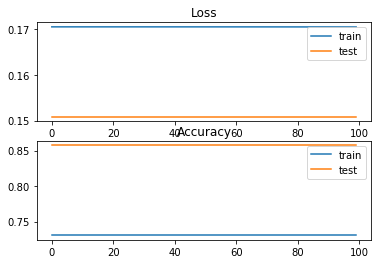

shape X_train (26, 9)
Progression.................................... 11.702127659574469 %

------------------- Duel : BC-DVD:BC-FN:BC-RDG -----------------
Train: 0.462, Test: 0.571
INFO:tensorflow:Assets written to: models/relu/BC-DVD:BC-FN:BC-RDG_adamax_train_0.46_test_0.57_loss_0.2099/assets


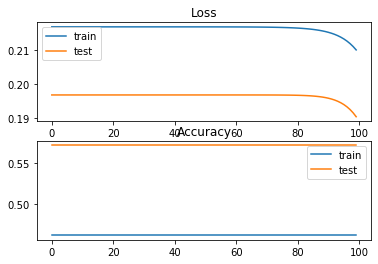

shape X_train (26, 8)
Progression.................................... 12.76595744680851 %

------------------- Duel : BC-DVD:BC-SOC -----------------
Train: 0.451, Test: 0.514
INFO:tensorflow:Assets written to: models/relu/BC-DVD:BC-SOC_adamax_train_0.45_test_0.51_loss_0.2803/assets


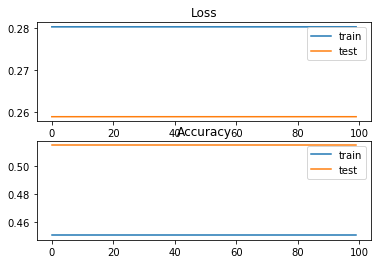

shape X_train (976, 17)
Progression.................................... 13.829787234042554 %

------------------- Duel : BC-SOC:BC-UMP -----------------
Train: 0.638, Test: 0.606
INFO:tensorflow:Assets written to: models/relu/BC-SOC:BC-UMP_adamax_train_0.64_test_0.61_loss_0.0163/assets


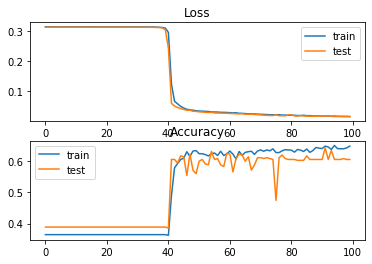

shape X_train (1397, 21)
Progression.................................... 14.893617021276595 %

------------------- Duel : BC-DVD:BC-FN -----------------
Train: 0.786, Test: 0.791
INFO:tensorflow:Assets written to: models/relu/BC-DVD:BC-FN_adamax_train_0.79_test_0.79_loss_0.1264/assets


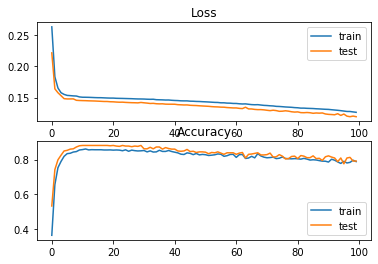

shape X_train (2279, 19)
Progression.................................... 15.957446808510639 %

------------------- Duel : BC-FN:BC-SOC:BC-UMP -----------------
Train: 0.328, Test: 0.333
INFO:tensorflow:Assets written to: models/relu/BC-FN:BC-SOC:BC-UMP_adamax_train_0.33_test_0.33_loss_0.2181/assets


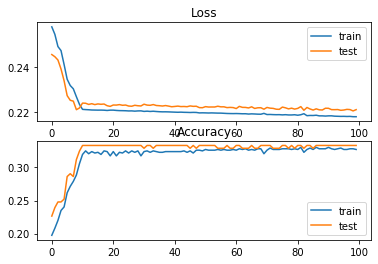

shape X_train (932, 15)
Progression.................................... 17.02127659574468 %

------------------- Duel : BC-DVG:BC-FN -----------------
Train: 0.353, Test: 0.350
INFO:tensorflow:Assets written to: models/relu/BC-DVG:BC-FN_adamax_train_0.35_test_0.35_loss_0.3140/assets


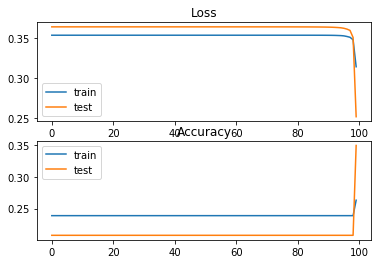

shape X_train (904, 20)
Progression.................................... 18.085106382978726 %

------------------- Duel : BC-SOC:BC-UD -----------------
Train: 0.835, Test: 0.826
INFO:tensorflow:Assets written to: models/relu/BC-SOC:BC-UD_adamax_train_0.84_test_0.83_loss_0.0099/assets


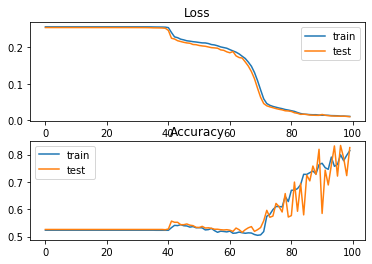

shape X_train (4565, 22)
Progression.................................... 19.148936170212767 %

------------------- Duel : BC-FG:BC-UD -----------------
Train: 0.521, Test: 0.582
INFO:tensorflow:Assets written to: models/relu/BC-FG:BC-UD_adamax_train_0.52_test_0.58_loss_0.2553/assets


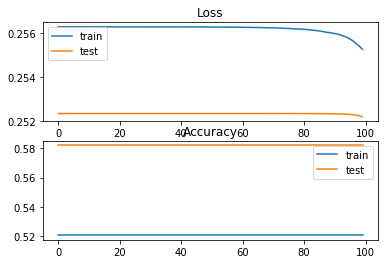

shape X_train (217, 14)
Progression.................................... 20.212765957446805 %

------------------- Duel : BC-EXD:BC-UMP -----------------
Train: 1.000, Test: 1.000
INFO:tensorflow:Assets written to: models/relu/BC-EXD:BC-UMP_adamax_train_1.00_test_1.00_loss_0.0854/assets


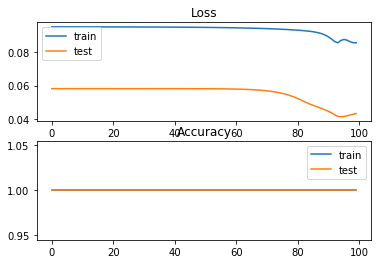

shape X_train (15, 10)
Progression.................................... 21.27659574468085 %

------------------- Duel : BC-DVD:BC-DVG -----------------
Train: 0.520, Test: 0.549
INFO:tensorflow:Assets written to: models/relu/BC-DVD:BC-DVG_adamax_train_0.52_test_0.55_loss_0.1768/assets


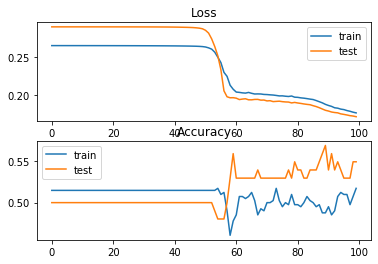

shape X_train (408, 17)
Progression.................................... 22.340425531914892 %

------------------- Duel : BC-DVG:BC-UMP -----------------
Train: 0.617, Test: 0.651
INFO:tensorflow:Assets written to: models/relu/BC-DVG:BC-UMP_adamax_train_0.62_test_0.65_loss_0.0480/assets


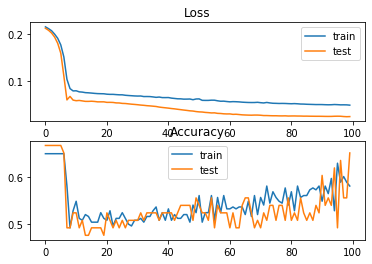

shape X_train (248, 18)
Progression.................................... 23.404255319148938 %

------------------- Duel : BC-DVG:BC-UD -----------------
Train: 0.667, Test: 0.660
INFO:tensorflow:Assets written to: models/relu/BC-DVG:BC-UD_adamax_train_0.67_test_0.66_loss_0.0261/assets


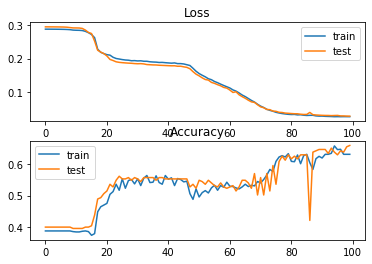

shape X_train (936, 17)
Progression.................................... 24.46808510638298 %

------------------- Duel : BC-DIV:BC-UD -----------------
Train: 0.750, Test: 0.615
INFO:tensorflow:Assets written to: models/relu/BC-DIV:BC-UD_adamax_train_0.75_test_0.62_loss_0.1479/assets


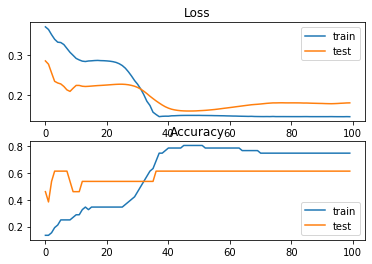

shape X_train (52, 12)
Progression.................................... 25.53191489361702 %

------------------- Duel : BC-COM:BC-FN:BC-UD -----------------
Train: 0.207, Test: 0.238
INFO:tensorflow:Assets written to: models/relu/BC-COM:BC-FN:BC-UD_adamax_train_0.21_test_0.24_loss_0.2403/assets


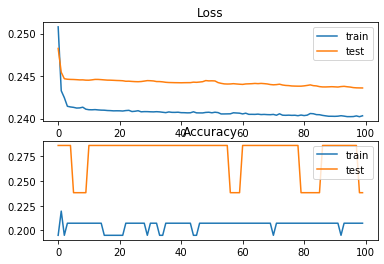

shape X_train (82, 9)
Progression.................................... 26.595744680851062 %

------------------- Duel : BC-UG:BC-UMP -----------------
Train: 0.809, Test: 0.738
INFO:tensorflow:Assets written to: models/relu/BC-UG:BC-UMP_adamax_train_0.81_test_0.74_loss_0.1802/assets


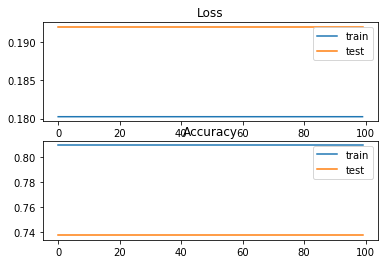

shape X_train (487, 15)
Progression.................................... 27.659574468085108 %

------------------- Duel : BC-FN:BC-SOC:BC-UD -----------------
Train: 0.637, Test: 0.601
INFO:tensorflow:Assets written to: models/relu/BC-FN:BC-SOC:BC-UD_adamax_train_0.64_test_0.60_loss_0.0433/assets


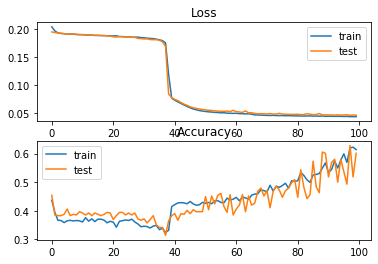

shape X_train (1743, 15)
Progression.................................... 28.723404255319153 %

------------------- Duel : BC-DVD:BC-FN:BC-UG -----------------
Train: 0.201, Test: 0.339
INFO:tensorflow:Assets written to: models/relu/BC-DVD:BC-FN:BC-UG_adamax_train_0.20_test_0.34_loss_0.1229/assets


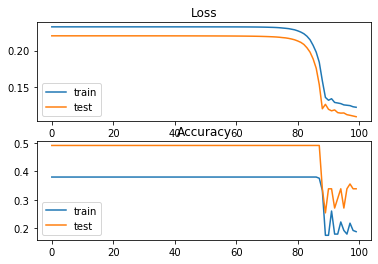

shape X_train (234, 11)
Progression.................................... 29.78723404255319 %

------------------- Duel : BC-FN:BC-UG:BC-UMP -----------------
Train: 0.318, Test: 0.266
INFO:tensorflow:Assets written to: models/relu/BC-FN:BC-UG:BC-UMP_adamax_train_0.32_test_0.27_loss_0.1433/assets


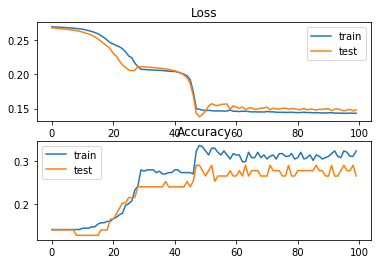

shape X_train (314, 13)
Progression.................................... 30.851063829787233 %

------------------- Duel : BC-FN:BC-SOC:BC-UDI -----------------
Train: 0.511, Test: 0.500
INFO:tensorflow:Assets written to: models/relu/BC-FN:BC-SOC:BC-UDI_adamax_train_0.51_test_0.50_loss_0.1998/assets


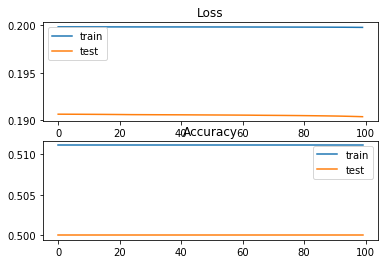

shape X_train (135, 12)
Progression.................................... 31.914893617021278 %

------------------- Duel : BC-DVG:BC-FN:BC-UD -----------------
Train: 0.280, Test: 0.296
INFO:tensorflow:Assets written to: models/relu/BC-DVG:BC-FN:BC-UD_adamax_train_0.28_test_0.30_loss_0.2479/assets


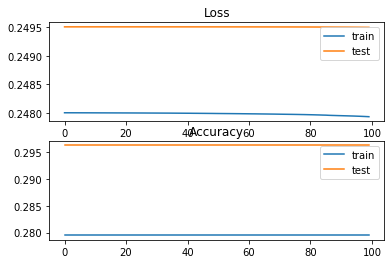

shape X_train (644, 16)
Progression.................................... 32.97872340425532 %

------------------- Duel : BC-DVD:BC-UD -----------------
Train: 0.393, Test: 0.426
INFO:tensorflow:Assets written to: models/relu/BC-DVD:BC-UD_adamax_train_0.39_test_0.43_loss_0.3020/assets


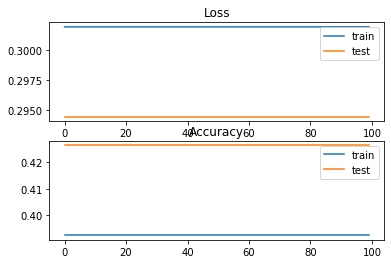

shape X_train (242, 15)
Progression.................................... 34.04255319148936 %

------------------- Duel : BC-DVD:BC-DVG:BC-FN -----------------
Train: 0.553, Test: 0.611
INFO:tensorflow:Assets written to: models/relu/BC-DVD:BC-DVG:BC-FN_adamax_train_0.55_test_0.61_loss_0.0562/assets


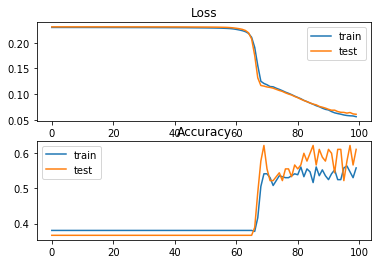

shape X_train (360, 12)
Progression.................................... 35.1063829787234 %

------------------- Duel : BC-DVG:BC-SOC -----------------
Train: 0.247, Test: 0.238
INFO:tensorflow:Assets written to: models/relu/BC-DVG:BC-SOC_adamax_train_0.25_test_0.24_loss_0.4027/assets


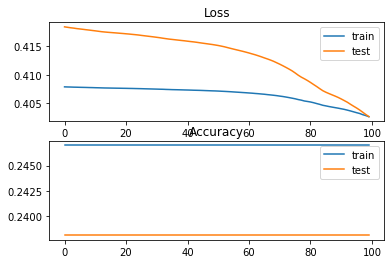

shape X_train (166, 13)
Progression.................................... 36.17021276595745 %

------------------- Duel : BC-DVD:BC-FN:BC-SOC -----------------
Train: 0.501, Test: 0.509
INFO:tensorflow:Assets written to: models/relu/BC-DVD:BC-FN:BC-SOC_adamax_train_0.50_test_0.51_loss_0.1317/assets


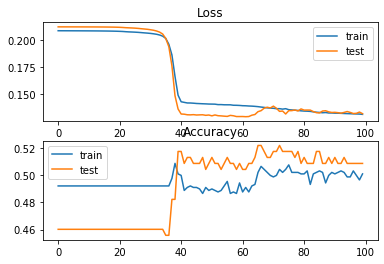

shape X_train (900, 15)
Progression.................................... 37.234042553191486 %

------------------- Duel : BC-RDG:BC-UDI -----------------
Train: 0.632, Test: 0.400
INFO:tensorflow:Assets written to: models/relu/BC-RDG:BC-UDI_adamax_train_0.63_test_0.40_loss_0.2369/assets


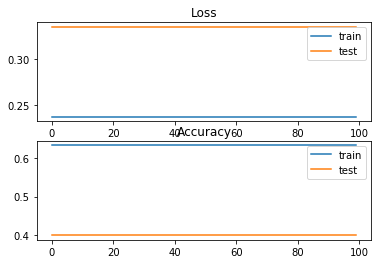

shape X_train (19, 9)
Progression.................................... 38.297872340425535 %

------------------- Duel : BC-SOC:BC-UDI -----------------
Train: 0.422, Test: 0.586
INFO:tensorflow:Assets written to: models/relu/BC-SOC:BC-UDI_adamax_train_0.42_test_0.59_loss_0.2634/assets


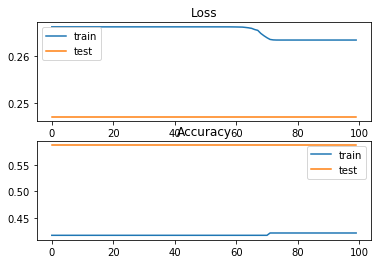

shape X_train (230, 15)
Progression.................................... 39.361702127659576 %

------------------- Duel : BC-DVD:BC-UDI:BC-UG -----------------
Train: 0.364, Test: 0.667
INFO:tensorflow:Assets written to: models/relu/BC-DVD:BC-UDI:BC-UG_adamax_train_0.36_test_0.67_loss_0.2140/assets


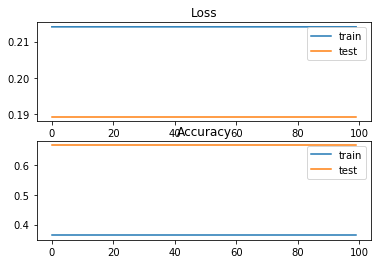

shape X_train (11, 9)
Progression.................................... 40.42553191489361 %

------------------- Duel : BC-DVD:BC-RDG -----------------
Train: 0.340, Test: 0.500
INFO:tensorflow:Assets written to: models/relu/BC-DVD:BC-RDG_adamax_train_0.34_test_0.50_loss_0.3178/assets


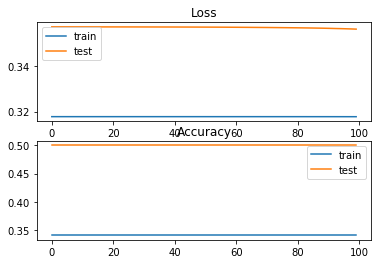

shape X_train (47, 12)
Progression.................................... 41.48936170212766 %

------------------- Duel : BC-COM:BC-FN -----------------
Train: 0.739, Test: 0.717
INFO:tensorflow:Assets written to: models/relu/BC-COM:BC-FN_adamax_train_0.74_test_0.72_loss_0.2106/assets


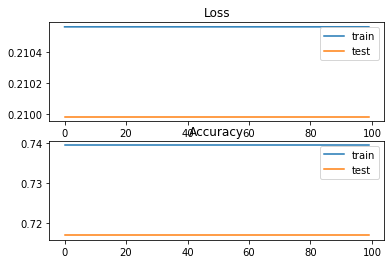

shape X_train (211, 14)
Progression.................................... 42.5531914893617 %

------------------- Duel : BC-MDM:BC-SOC -----------------
Train: 0.500, Test: 0.500
INFO:tensorflow:Assets written to: models/relu/BC-MDM:BC-SOC_adamax_train_0.50_test_0.50_loss_0.0728/assets


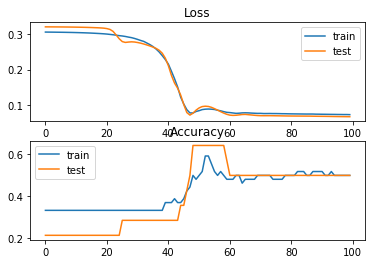

shape X_train (54, 11)
Progression.................................... 43.61702127659575 %

------------------- Duel : BC-DIV:BC-DVD -----------------
Train: 0.642, Test: 0.588
INFO:tensorflow:Assets written to: models/relu/BC-DIV:BC-DVD_adamax_train_0.64_test_0.59_loss_0.2353/assets


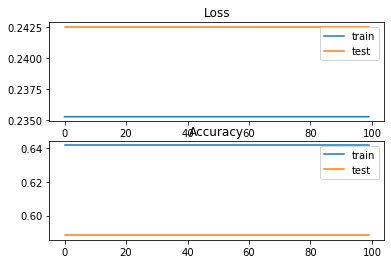

shape X_train (134, 12)
Progression.................................... 44.680851063829785 %

------------------- Duel : BC-DIV:BC-DVG -----------------
Train: 0.421, Test: 0.500
INFO:tensorflow:Assets written to: models/relu/BC-DIV:BC-DVG_adamax_train_0.42_test_0.50_loss_0.3079/assets


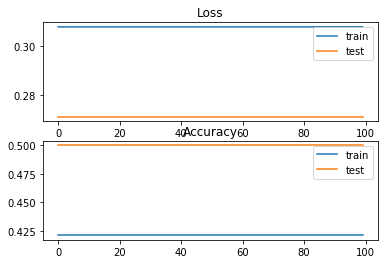

shape X_train (38, 9)
Progression.................................... 45.744680851063826 %

------------------- Duel : BC-RDG:BC-SOC -----------------
Train: 0.643, Test: 0.862
INFO:tensorflow:Assets written to: models/relu/BC-RDG:BC-SOC_adamax_train_0.64_test_0.86_loss_0.2062/assets


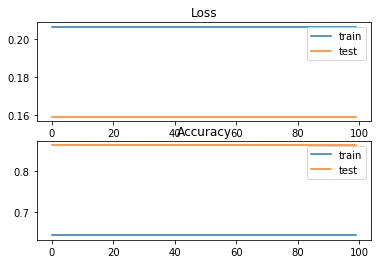

shape X_train (115, 14)
Progression.................................... 46.808510638297875 %

------------------- Duel : BC-FN:BC-RDG -----------------
Train: 0.000, Test: 0.000
INFO:tensorflow:Assets written to: models/relu/BC-FN:BC-RDG_adamax_train_0.00_test_0.00_loss_0.3813/assets


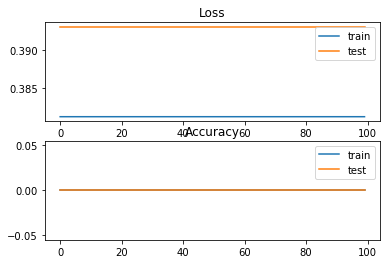

shape X_train (28, 11)
Progression.................................... 47.87234042553192 %

------------------- Duel : BC-FG:BC-FN -----------------
Train: 0.241, Test: 0.200
INFO:tensorflow:Assets written to: models/relu/BC-FG:BC-FN_adamax_train_0.24_test_0.20_loss_0.3580/assets


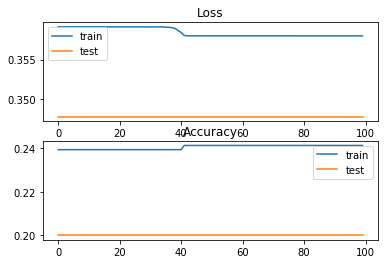

shape X_train (518, 16)
Progression.................................... 48.93617021276596 %

------------------- Duel : BC-RDG:BC-UD -----------------
Train: 0.522, Test: 0.647
INFO:tensorflow:Assets written to: models/relu/BC-RDG:BC-UD_adamax_train_0.52_test_0.65_loss_0.2538/assets


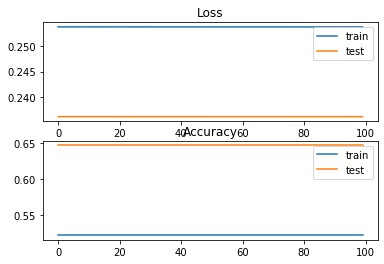

shape X_train (136, 13)
Progression.................................... 50.0 %

------------------- Duel : BC-UDI:BC-UG -----------------
Train: 0.353, Test: 0.800
INFO:tensorflow:Assets written to: models/relu/BC-UDI:BC-UG_adamax_train_0.35_test_0.80_loss_0.2665/assets


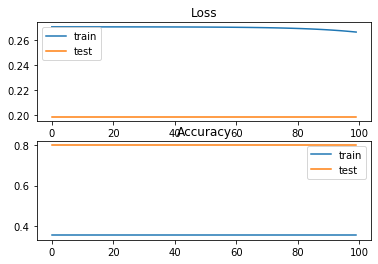

shape X_train (17, 9)
Progression.................................... 51.06382978723404 %

------------------- Duel : BC-SOC:BC-UC -----------------
Train: 0.431, Test: 0.545
INFO:tensorflow:Assets written to: models/relu/BC-SOC:BC-UC_adamax_train_0.43_test_0.55_loss_0.2811/assets


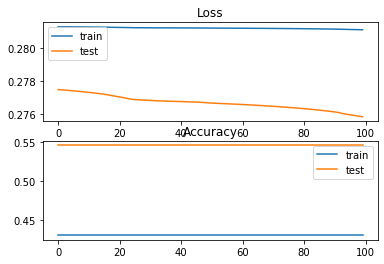

shape X_train (130, 14)
Progression.................................... 52.12765957446809 %

------------------- Duel : BC-UD:BC-VEC -----------------
Train: 0.588, Test: 0.600
INFO:tensorflow:Assets written to: models/relu/BC-UD:BC-VEC_adamax_train_0.59_test_0.60_loss_0.2321/assets


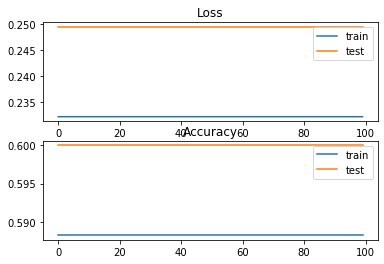

shape X_train (17, 9)
Progression.................................... 53.191489361702125 %

------------------- Duel : BC-DIV:BC-DVD:BC-FN -----------------
Train: 0.697, Test: 0.706
INFO:tensorflow:Assets written to: models/relu/BC-DIV:BC-DVD:BC-FN_adamax_train_0.70_test_0.71_loss_0.1663/assets


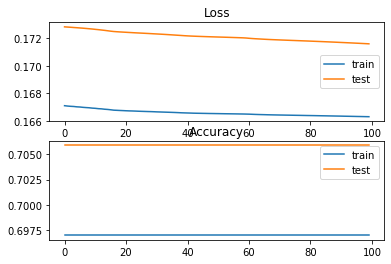

shape X_train (66, 8)
Progression.................................... 54.25531914893617 %

------------------- Duel : BC-FG:BC-FN:BC-UD -----------------
Train: 0.333, Test: 0.250
INFO:tensorflow:Assets written to: models/relu/BC-FG:BC-FN:BC-UD_adamax_train_0.33_test_0.25_loss_0.2226/assets


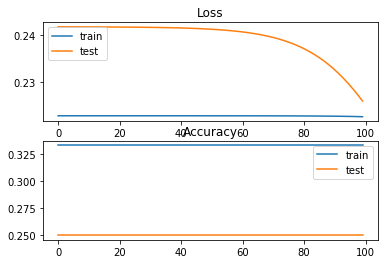

shape X_train (30, 8)
Progression.................................... 55.319148936170215 %

------------------- Duel : BC-DVG:BC-FN:BC-SOC -----------------
Train: 0.130, Test: 0.167
INFO:tensorflow:Assets written to: models/relu/BC-DVG:BC-FN:BC-SOC_adamax_train_0.13_test_0.17_loss_0.3094/assets


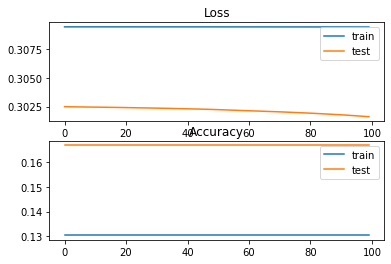

shape X_train (46, 10)
Progression.................................... 56.38297872340425 %

------------------- Duel : BC-DVG:BC-UG -----------------
Train: 0.713, Test: 0.611
INFO:tensorflow:Assets written to: models/relu/BC-DVG:BC-UG_adamax_train_0.71_test_0.61_loss_0.1267/assets


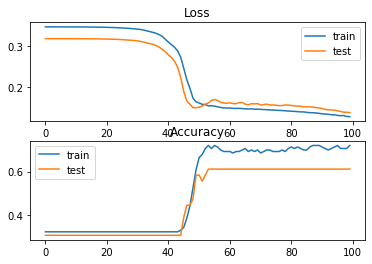

shape X_train (143, 14)
Progression.................................... 57.446808510638306 %

------------------- Duel : BC-UMP:BC-VEC -----------------
Train: 0.500, Test: 0.250
INFO:tensorflow:Assets written to: models/relu/BC-UMP:BC-VEC_adamax_train_0.50_test_0.25_loss_0.2502/assets


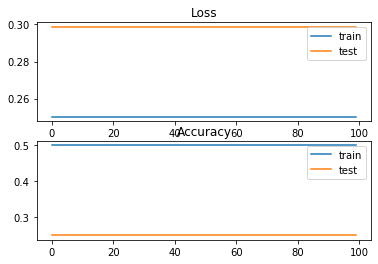

shape X_train (30, 11)
Progression.................................... 58.51063829787234 %

------------------- Duel : BC-DVG:BC-UDI -----------------
Train: 0.486, Test: 0.526
INFO:tensorflow:Assets written to: models/relu/BC-DVG:BC-UDI_adamax_train_0.49_test_0.53_loss_0.2742/assets


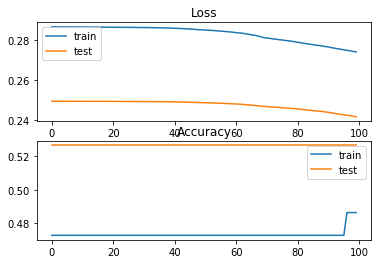

shape X_train (74, 10)
Progression.................................... 59.57446808510638 %

------------------- Duel : BC-DIV:BC-DVG:BC-FN -----------------
Train: 0.577, Test: 0.462
INFO:tensorflow:Assets written to: models/relu/BC-DIV:BC-DVG:BC-FN_adamax_train_0.58_test_0.46_loss_0.1366/assets


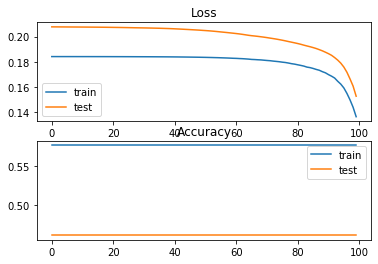

shape X_train (52, 9)
Progression.................................... 60.63829787234043 %

------------------- Duel : BC-UD:BC-UDI -----------------
Train: 0.375, Test: 0.167
INFO:tensorflow:Assets written to: models/relu/BC-UD:BC-UDI_adamax_train_0.38_test_0.17_loss_0.3357/assets


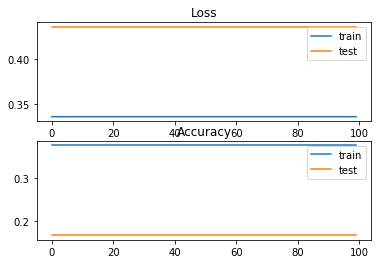

shape X_train (24, 11)
Progression.................................... 61.702127659574465 %

------------------- Duel : BC-FN:BC-MDM -----------------
Train: 1.000, Test: 1.000
INFO:tensorflow:Assets written to: models/relu/BC-FN:BC-MDM_adamax_train_1.00_test_1.00_loss_0.0805/assets


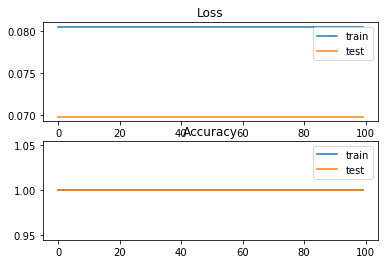

shape X_train (12, 10)
Progression.................................... 62.76595744680851 %

------------------- Duel : BC-DVG:BC-FN:BC-UDI -----------------
Train: 0.500, Test: 0.632
INFO:tensorflow:Assets written to: models/relu/BC-DVG:BC-FN:BC-UDI_adamax_train_0.50_test_0.63_loss_0.1963/assets


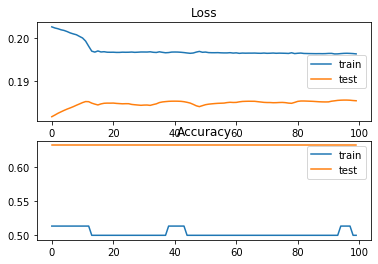

shape X_train (74, 9)
Progression.................................... 63.829787234042556 %

------------------- Duel : BC-DVD:BC-FN:BC-UD -----------------
Train: 0.418, Test: 0.118
INFO:tensorflow:Assets written to: models/relu/BC-DVD:BC-FN:BC-UD_adamax_train_0.42_test_0.12_loss_0.1565/assets


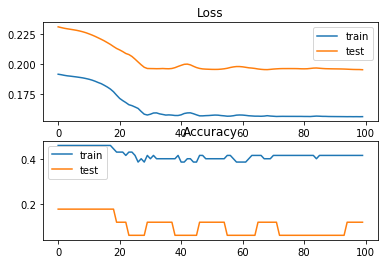

shape X_train (67, 10)
Progression.................................... 64.8936170212766 %

------------------- Duel : BC-DVG:BC-FN:BC-UMP -----------------
Train: 0.409, Test: 0.551
INFO:tensorflow:Assets written to: models/relu/BC-DVG:BC-FN:BC-UMP_adamax_train_0.41_test_0.55_loss_0.1236/assets


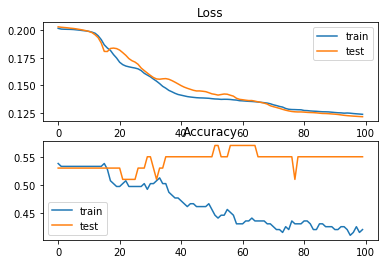

shape X_train (193, 13)
Progression.................................... 65.95744680851064 %

------------------- Duel : BC-DVD:BC-VEC -----------------
Train: 0.262, Test: 0.091
INFO:tensorflow:Assets written to: models/relu/BC-DVD:BC-VEC_adamax_train_0.26_test_0.09_loss_0.3354/assets


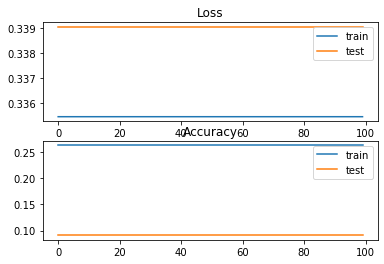

shape X_train (42, 10)
Progression.................................... 67.02127659574468 %

------------------- Duel : BC-DIV:BC-FN -----------------
Train: 0.329, Test: 0.333
INFO:tensorflow:Assets written to: models/relu/BC-DIV:BC-FN_adamax_train_0.33_test_0.33_loss_0.3314/assets


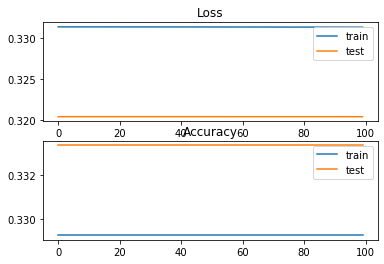

shape X_train (82, 12)
Progression.................................... 68.08510638297872 %

------------------- Duel : BC-DVG:BC-FG -----------------
Train: 0.143, Test: 0.111
INFO:tensorflow:Assets written to: models/relu/BC-DVG:BC-FG_adamax_train_0.14_test_0.11_loss_0.3747/assets


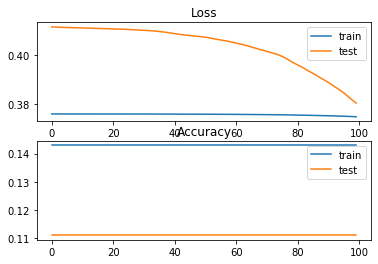

shape X_train (35, 9)
Progression.................................... 69.14893617021278 %

------------------- Duel : BC-MDM:BC-UMP -----------------
Train: 0.500, Test: 0.600
INFO:tensorflow:Assets written to: models/relu/BC-MDM:BC-UMP_adamax_train_0.50_test_0.60_loss_0.1242/assets


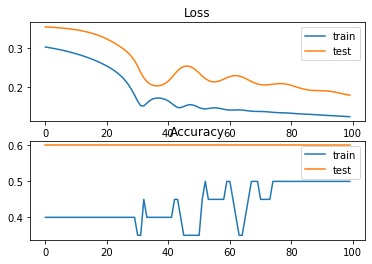

shape X_train (20, 13)
Progression.................................... 70.2127659574468 %

------------------- Duel : BC-UD:BC-UMP -----------------
Train: 0.440, Test: 0.714
INFO:tensorflow:Assets written to: models/relu/BC-UD:BC-UMP_adamax_train_0.44_test_0.71_loss_0.2749/assets


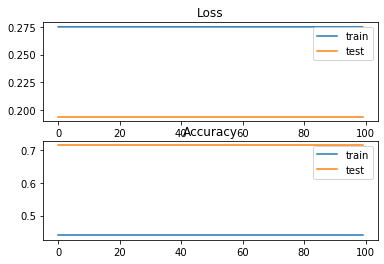

shape X_train (25, 9)
Progression.................................... 71.27659574468085 %

------------------- Duel : BC-DVD:BC-UMP -----------------
Train: 0.544, Test: 0.514
INFO:tensorflow:Assets written to: models/relu/BC-DVD:BC-UMP_adamax_train_0.54_test_0.51_loss_0.0862/assets


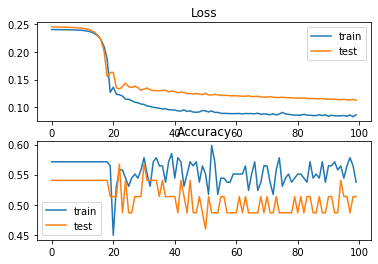

shape X_train (147, 11)
Progression.................................... 72.3404255319149 %

------------------- Duel : BC-DVD:BC-FN:BC-UMP -----------------
Train: 0.207, Test: 0.103
INFO:tensorflow:Assets written to: models/relu/BC-DVD:BC-FN:BC-UMP_adamax_train_0.21_test_0.10_loss_0.2633/assets


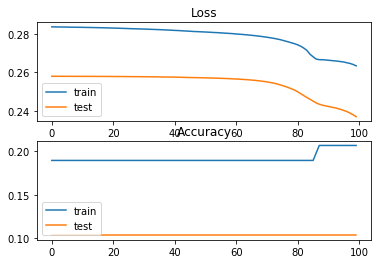

shape X_train (116, 10)
Progression.................................... 73.40425531914893 %

------------------- Duel : BC-UC:BC-UG -----------------
Train: 0.533, Test: 0.750
INFO:tensorflow:Assets written to: models/relu/BC-UC:BC-UG_adamax_train_0.53_test_0.75_loss_0.2490/assets


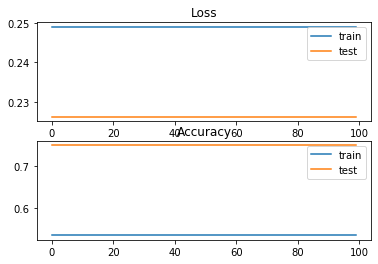

shape X_train (15, 11)
Progression.................................... 74.46808510638297 %

------------------- Duel : BC-DVD:BC-FN:BC-UDI -----------------
Train: 0.517, Test: 0.600
INFO:tensorflow:Assets written to: models/relu/BC-DVD:BC-FN:BC-UDI_adamax_train_0.52_test_0.60_loss_0.1235/assets


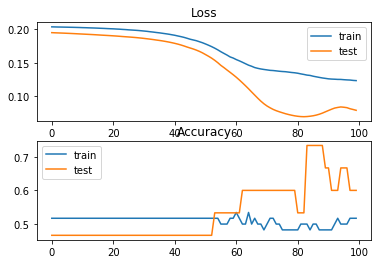

shape X_train (58, 9)
Progression.................................... 75.53191489361703 %

------------------- Duel : BC-COM:BC-FN:BC-UDI -----------------
Train: 0.250, Test: 0.222
INFO:tensorflow:Assets written to: models/relu/BC-COM:BC-FN:BC-UDI_adamax_train_0.25_test_0.22_loss_0.2438/assets


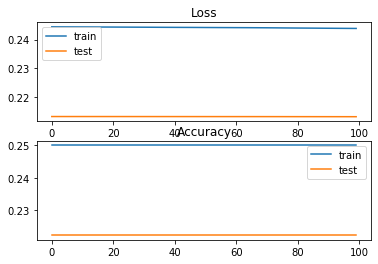

shape X_train (36, 9)
Progression.................................... 76.59574468085107 %

------------------- Duel : BC-DVD:BC-UDI -----------------
Train: 0.614, Test: 0.727
INFO:tensorflow:Assets written to: models/relu/BC-DVD:BC-UDI_adamax_train_0.61_test_0.73_loss_0.2292/assets


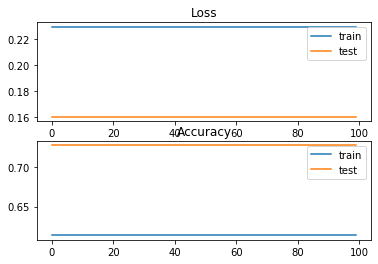

shape X_train (44, 11)
Progression.................................... 77.6595744680851 %

------------------- Duel : BC-FN:BC-MDM:BC-UD -----------------
Train: 0.143, Test: 0.000
INFO:tensorflow:Assets written to: models/relu/BC-FN:BC-MDM:BC-UD_adamax_train_0.14_test_0.00_loss_0.2761/assets


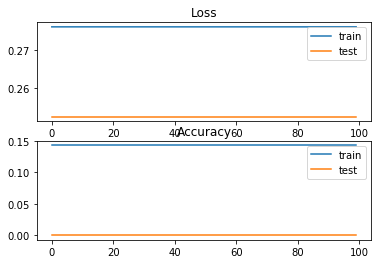

shape X_train (28, 8)
Progression.................................... 78.72340425531915 %

------------------- Duel : BC-FG:BC-UG -----------------
Train: 0.578, Test: 0.571
INFO:tensorflow:Assets written to: models/relu/BC-FG:BC-UG_adamax_train_0.58_test_0.57_loss_0.2493/assets


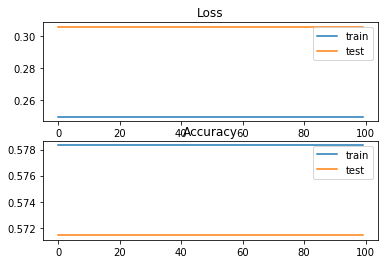

shape X_train (83, 11)
Progression.................................... 79.7872340425532 %

------------------- Duel : BC-DVG:BC-UC -----------------
Train: 0.354, Test: 0.250
INFO:tensorflow:Assets written to: models/relu/BC-DVG:BC-UC_adamax_train_0.35_test_0.25_loss_0.3936/assets


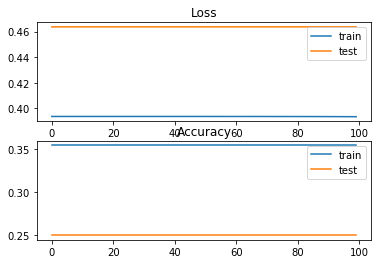

shape X_train (48, 9)
Progression.................................... 80.85106382978722 %

------------------- Duel : BC-DVG:BC-MDM -----------------
Train: 0.000, Test: 0.000
INFO:tensorflow:Assets written to: models/relu/BC-DVG:BC-MDM_adamax_train_0.00_test_0.00_loss_0.4906/assets


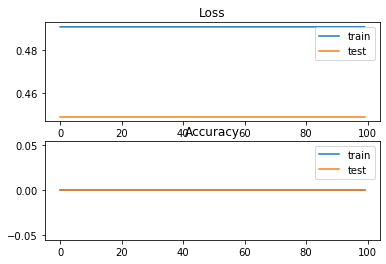

shape X_train (15, 8)
Progression.................................... 81.91489361702128 %

------------------- Duel : BC-DIV:BC-MDM -----------------
Train: 0.091, Test: 0.167
INFO:tensorflow:Assets written to: models/relu/BC-DIV:BC-MDM_adamax_train_0.09_test_0.17_loss_0.4078/assets


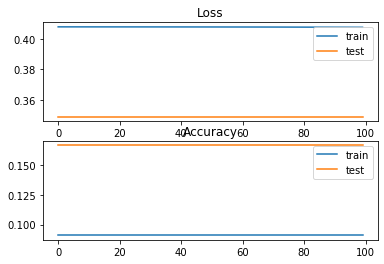

shape X_train (44, 9)
Progression.................................... 82.97872340425532 %

------------------- Duel : BC-DIV:BC-UMP -----------------
Train: 0.737, Test: 0.600
INFO:tensorflow:Assets written to: models/relu/BC-DIV:BC-UMP_adamax_train_0.74_test_0.60_loss_0.1958/assets


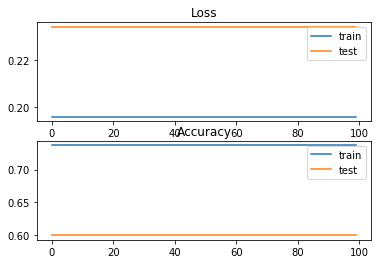

shape X_train (19, 11)
Progression.................................... 84.04255319148936 %

------------------- Duel : BC-RDG:BC-UG -----------------
Train: 0.823, Test: 0.938
INFO:tensorflow:Assets written to: models/relu/BC-RDG:BC-UG_adamax_train_0.82_test_0.94_loss_0.1354/assets


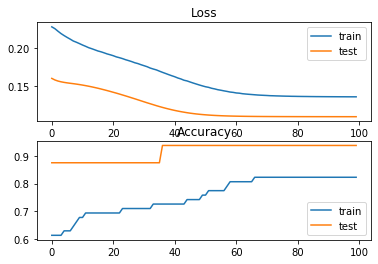

shape X_train (62, 9)
Progression.................................... 85.1063829787234 %

------------------- Duel : BC-DIV:BC-FN:BC-UD -----------------
Train: 0.333, Test: 0.500
INFO:tensorflow:Assets written to: models/relu/BC-DIV:BC-FN:BC-UD_adamax_train_0.33_test_0.50_loss_0.2375/assets


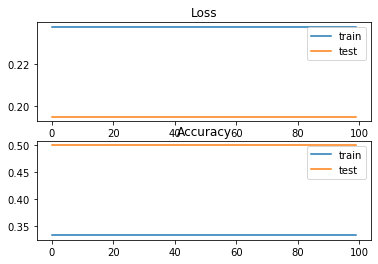

shape X_train (21, 9)
Progression.................................... 86.17021276595744 %

------------------- Duel : BC-UDI:BC-UMP -----------------
Train: 0.696, Test: 0.583
INFO:tensorflow:Assets written to: models/relu/BC-UDI:BC-UMP_adamax_train_0.70_test_0.58_loss_0.2012/assets


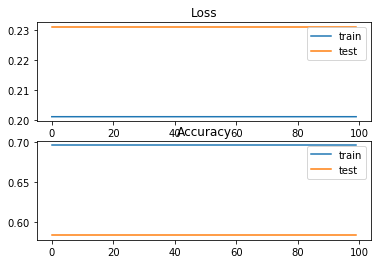

shape X_train (46, 9)
Progression.................................... 87.2340425531915 %

------------------- Duel : BC-FG:BC-SOC -----------------
Train: 0.769, Test: 0.500
INFO:tensorflow:Assets written to: models/relu/BC-FG:BC-SOC_adamax_train_0.77_test_0.50_loss_0.2189/assets


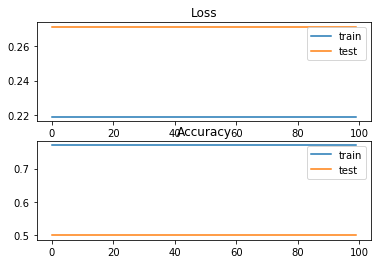

shape X_train (13, 9)
Progression.................................... 88.29787234042553 %

------------------- Duel : BC-FN:BC-UMP:BC-VEC -----------------
Train: 0.222, Test: 0.429
INFO:tensorflow:Assets written to: models/relu/BC-FN:BC-UMP:BC-VEC_adamax_train_0.22_test_0.43_loss_0.1480/assets


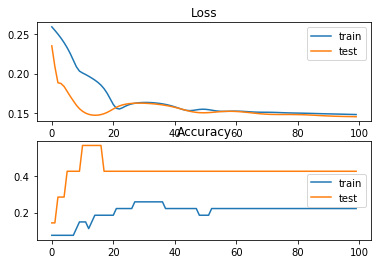

shape X_train (27, 10)
Progression.................................... 89.36170212765957 %

------------------- Duel : BC-FG:BC-UDI -----------------
Train: 0.433, Test: 0.312
INFO:tensorflow:Assets written to: models/relu/BC-FG:BC-UDI_adamax_train_0.43_test_0.31_loss_0.3067/assets


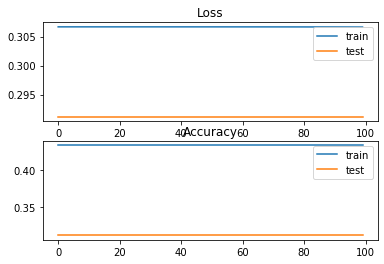

shape X_train (60, 10)
Progression.................................... 90.42553191489363 %

------------------- Duel : BC-FN:BC-RDG:BC-UD -----------------
Train: 0.333, Test: 0.571
INFO:tensorflow:Assets written to: models/relu/BC-FN:BC-RDG:BC-UD_adamax_train_0.33_test_0.57_loss_0.2003/assets


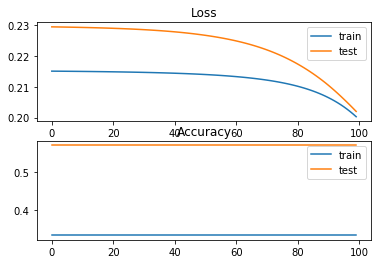

shape X_train (27, 11)
Progression.................................... 91.48936170212765 %

------------------- Duel : BC-DVG:BC-FN:BC-RDG -----------------
Train: 0.125, Test: 0.000
INFO:tensorflow:Assets written to: models/relu/BC-DVG:BC-FN:BC-RDG_adamax_train_0.12_test_0.00_loss_0.2873/assets


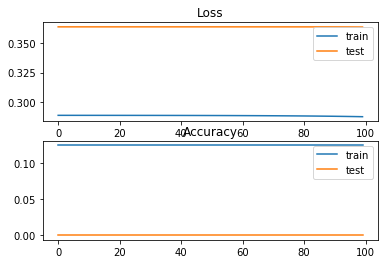

shape X_train (24, 11)
Progression.................................... 92.5531914893617 %

------------------- Duel : BC-FN:BC-VEC -----------------
Train: 0.850, Test: 0.833
INFO:tensorflow:Assets written to: models/relu/BC-FN:BC-VEC_adamax_train_0.85_test_0.83_loss_0.1760/assets


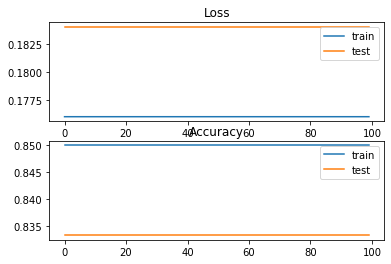

shape X_train (20, 9)
Progression.................................... 93.61702127659575 %

------------------- Duel : BC-EXD:BC-UG -----------------
Train: 0.850, Test: 1.000
INFO:tensorflow:Assets written to: models/relu/BC-EXD:BC-UG_adamax_train_0.85_test_1.00_loss_0.1911/assets


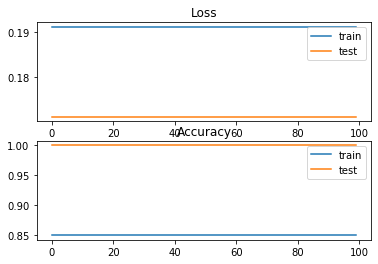

shape X_train (20, 8)
Progression.................................... 94.68085106382979 %

------------------- Duel : BC-EXD:BC-FN -----------------
Train: 0.227, Test: 0.500
INFO:tensorflow:Assets written to: models/relu/BC-EXD:BC-FN_adamax_train_0.23_test_0.50_loss_0.2647/assets


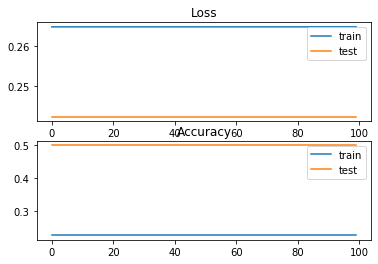

shape X_train (22, 10)
Progression.................................... 95.74468085106383 %

------------------- Duel : BC-FN:BC-SOC:BC-UC -----------------
Train: 0.250, Test: 0.000
INFO:tensorflow:Assets written to: models/relu/BC-FN:BC-SOC:BC-UC_adamax_train_0.25_test_0.00_loss_0.1515/assets


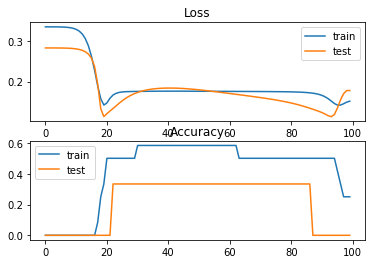

shape X_train (12, 9)
Progression.................................... 96.80851063829788 %

------------------- Duel : BC-FN:BC-UDI:BC-UG -----------------
Train: 0.500, Test: 0.000
INFO:tensorflow:Assets written to: models/relu/BC-FN:BC-UDI:BC-UG_adamax_train_0.50_test_0.00_loss_0.2024/assets


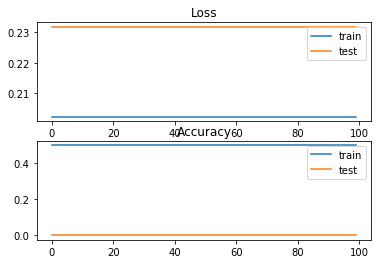

shape X_train (10, 11)
Progression.................................... 97.87234042553192 %

------------------- Duel : BC-DLF:BC-UG -----------------
Train: 0.000, Test: 0.000
INFO:tensorflow:Assets written to: models/relu/BC-DLF:BC-UG_adamax_train_0.00_test_0.00_loss_0.4715/assets


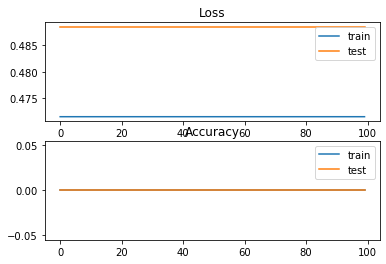

shape X_train (28, 10)
Progression.................................... 98.93617021276596 %

------------------- Duel : BC-FG:BC-UMP -----------------
Train: 0.642, Test: 0.571
INFO:tensorflow:Assets written to: models/relu/BC-FG:BC-UMP_adamax_train_0.64_test_0.57_loss_0.2533/assets


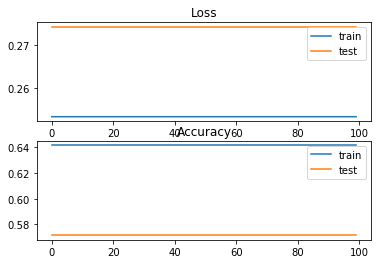

shape X_train (53, 11)
Progression.................................... 100.0 %


In [378]:
tf.keras.backend.clear_session()

act = "elu"
opti = "adamax"

models = dict()
for duel, dataset in datasetDuels.items():
    X_train, X_test, y_train, y_test = dataset

    model = tf.keras.Sequential()
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)))
    model.add(tf.keras.layers.Dense(32, activation=act))
    model.add(tf.keras.layers.Dense(y_train.shape[1], activation='softmax'))

    # opt = tf.keras.optimizers.Adagrad(learning_rate=0.00001)
    opt = tf.keras.optimizers.Adamax(learning_rate=0.0001)
    model.compile(loss='mse', optimizer=opt, metrics=['accuracy'])
    models[duel] = model

def saveAllModels(models,datasetDuels, activation, opti, count=None):
    i=0
    for duel in datasetDuels.keys():
        if count is not None and i>=count:
            break

        tf.keras.backend.clear_session()

        model= models[duel]
        X_train, X_test, y_train, y_test = datasetDuels[duel]

        history = model.fit(X_train, y_train, batch_size=32, validation_data=(X_test, y_test), epochs=100, verbose=0)
        print('\n------------------- Duel :',duel , '-----------------')

        # evaluate the model
        _, train_acc = model.evaluate(X_train, y_train, verbose=0)
        _, test_acc = model.evaluate(X_test, y_test, verbose=0)
        print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
        # plot loss during training
        pyplot.subplot(211)
        pyplot.title('Loss')
        pyplot.plot(history.history['loss'], label='train')
        pyplot.plot(history.history['val_loss'], label='test')
        pyplot.legend()
        
        # plot accuracy during training
        pyplot.subplot(212)
        pyplot.title('Accuracy')
        pyplot.plot(history.history['accuracy'], label='train')
        pyplot.plot(history.history['val_accuracy'], label='test')
        pyplot.legend()
        
        hist = history.history['loss']
        saveName = duel +'_'+opti+ '_train_' + f'{train_acc:.2f}'+ '_test_' + f'{test_acc:.2f}'+'_loss_'+ f'{hist[-1]:.4f}'
        model.save('models/'+activation+'/'+saveName)
        pyplot.savefig('models/saveFig/'+activation+'/'+ saveName +'.png')

        pyplot.show()
        i+=1
        print('shape X_train', X_train.shape)
        print('Progression....................................', (i/len(datasetDuels.keys()))*100,'%')


saveAllModels(models,datasetDuels, act, opti)


In [353]:
history.history['loss'][-1]

0.0032878315541893244